<a href="https://colab.research.google.com/github/tirthmagnus/CS-668-CS-668-/blob/main/Cs_668__EDa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from sklearn.metrics import r2_score


# Load the dataset
data = pd.read_excel('/content/SalesForCourse_quizz_table.xlsx')



In [ ]:
# Display the first few rows of the dataset
data.head()


,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,2016-02-19,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,2016-02-20,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2016-02-27,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [ ]:
data.shape

(2574, 12)

In [ ]:
# Display basic information about the data
print(data.info())

# Display summary statistics for numerical columns
numeric_summary = data.describe(include=np.number).T[['min', '25%', '50%', '75%', 'max']]
print(numeric_summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Year              34866 non-null  float64       
 2   Month             34866 non-null  object        
 3   Customer Age      34866 non-null  float64       
 4   Customer Gender   34866 non-null  object        
 5   Country           34866 non-null  object        
 6   State             34866 non-null  object        
 7   Product Category  34866 non-null  object        
 8   Sub Category      34866 non-null  object        
 9   Quantity          34866 non-null  float64       
 10  Unit Cost         34866 non-null  float64       
 11  Unit Price        34866 non-null  float64       
 12  Cost              34866 non-null  float64       
 13  Revenue           34867 non-null  float64       
 14  Column1           2574

In [ ]:
# Replace non-finite values in 'Year' with a placeholder
data['Year'].replace([np.inf, -np.inf, np.nan], -1, inplace=True)

# Convert 'Year' to integer
data['Year'] = data['Year'].astype(int)

# Replace non-finite values in 'Year' with a placeholder
data['Customer Age'].replace([np.inf, -np.inf, np.nan], -1, inplace=True)
# Convert 'Customer Age' to integer
data['Customer Age'] = data['Customer Age'].astype(int)


In [ ]:
# Check updated data types
data.dtypes


Date                datetime64[ns]
Year                         int64
Month                       object
Customer Age                 int64
Customer Gender             object
Country                     object
State                       object
Product Category            object
Sub Category                object
Quantity                   float64
Unit Cost                  float64
Unit Price                 float64
Cost                       float64
Revenue                    float64
Column1                    float64
dtype: object

In [ ]:
# Check for null values and count them in the entire DataFrame
null_counts = data.isnull().sum()
print(null_counts)


Date                    1
Year                    0
Month                   1
Customer Age            0
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64


In [ ]:
unique_counts = data.nunique()
print(unique_counts)


Date                 576
Year                   3
Month                 12
Customer Age          71
Customer Gender        2
Country                4
State                 45
Product Category       3
Sub Category          17
Quantity               3
Unit Cost            882
Unit Price          5175
Cost                 417
Revenue             3023
Column1             1281
dtype: int64


In [ ]:
data = data.dropna()
data = data.drop("Column1",axis=1)


In [ ]:
data.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
312,2016-01-11,2016,January,40,M,France,Yveline,Bikes,Road Bikes,3.0,567.0,790.0,1701.0,2370.0
313,2016-01-11,2016,January,40,M,France,Yveline,Accessories,Helmets,2.0,192.5,199.0,385.0,398.0
314,2016-01-18,2016,January,40,M,France,Yveline,Bikes,Mountain Bikes,2.0,1160.0,1511.5,2320.0,3023.0
315,2016-01-18,2016,January,40,M,France,Yveline,Accessories,Bottles and Cages,2.0,115.0,147.0,230.0,294.0
316,2016-01-18,2016,January,40,M,France,Yveline,Accessories,Bottles and Cages,1.0,140.0,167.0,140.0,167.0


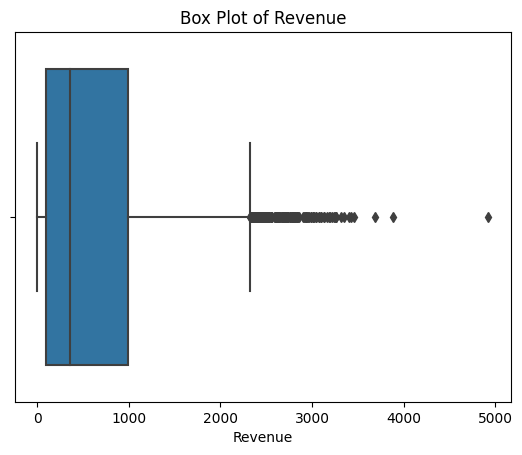

In [ ]:
# Assuming your DataFrame is named 'data' and your target variable is 'Revenue'
sns.boxplot(x=data['Revenue'])
plt.title('Box Plot of Revenue')
plt.show()


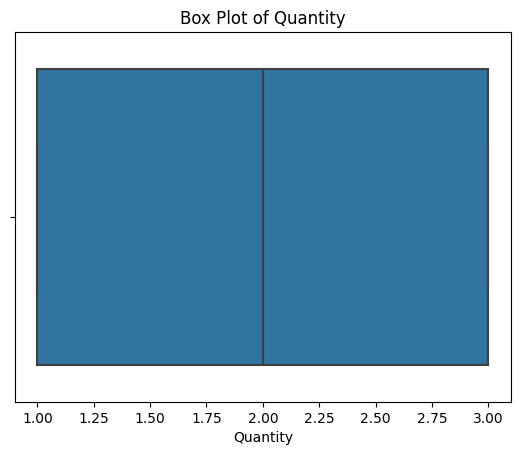

In [ ]:
# Assuming your DataFrame is named 'data' and your target variable is 'Quantity'
sns.boxplot(x=data['Quantity'])
plt.title('Box Plot of Quantity')
plt.show()


<ipython-input-40-5026d929b441>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


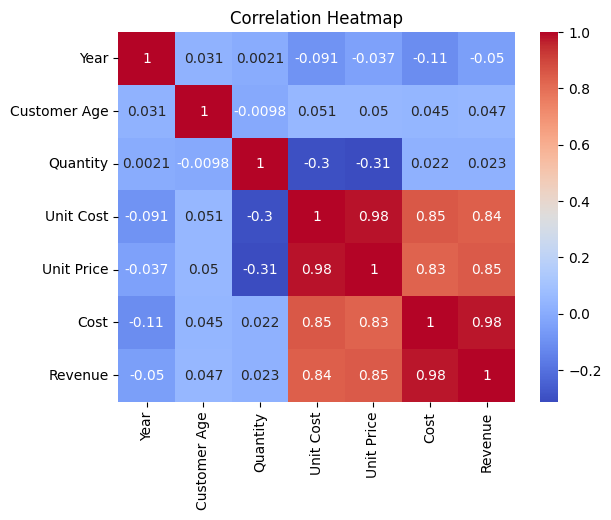

In [ ]:
# Pairwise correlations
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


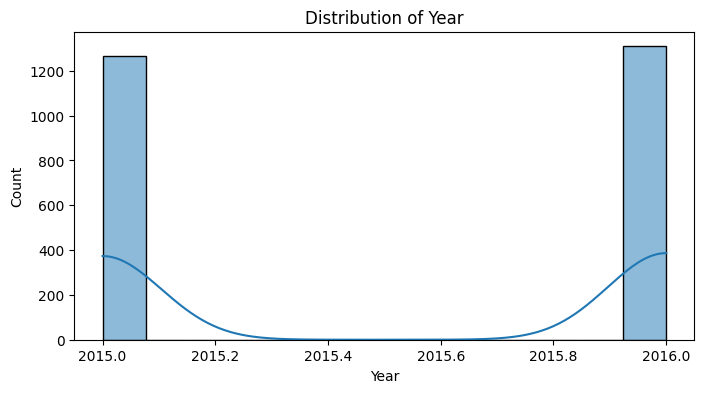

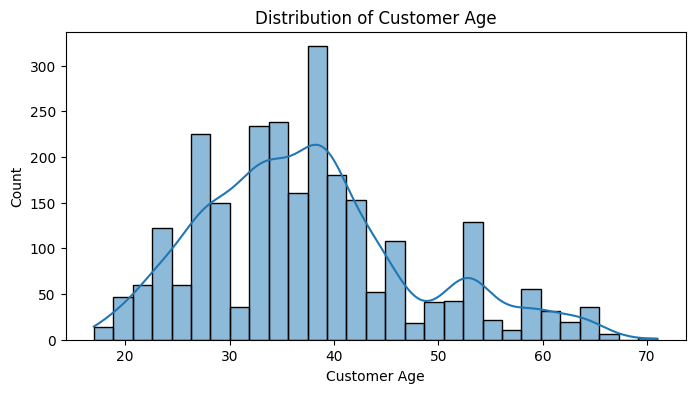

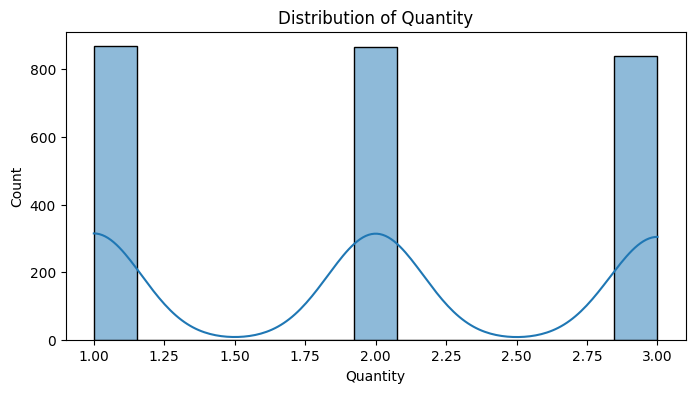

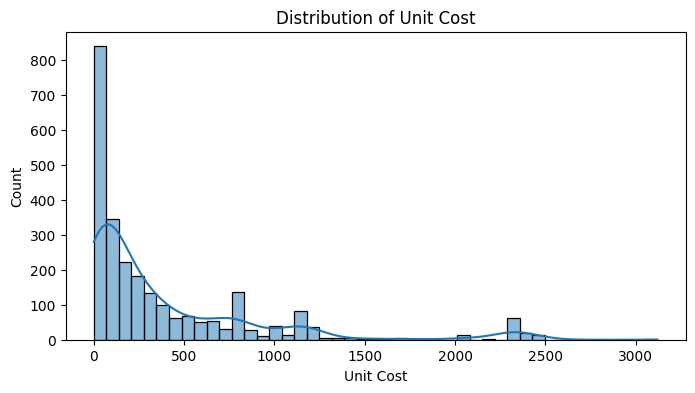

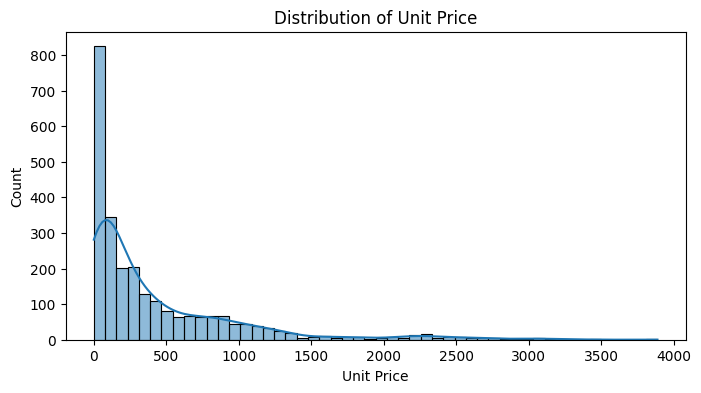

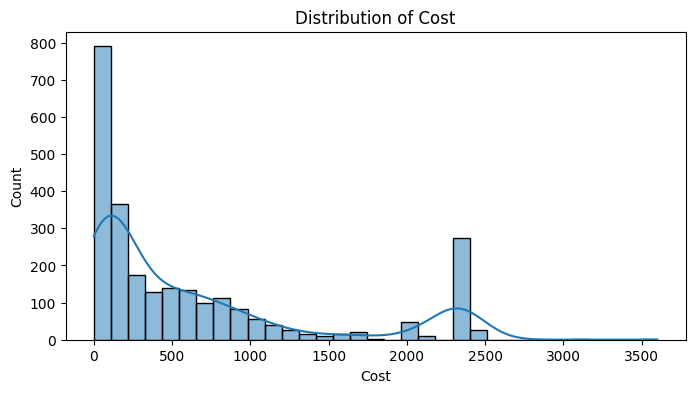

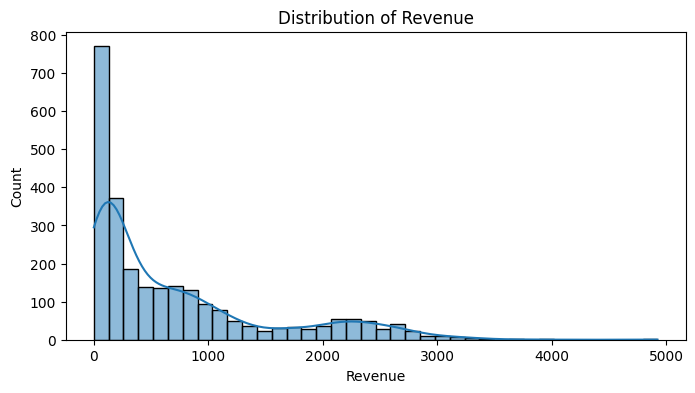

In [ ]:
# Distribution of numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64'])
for feature in numerical_features.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()



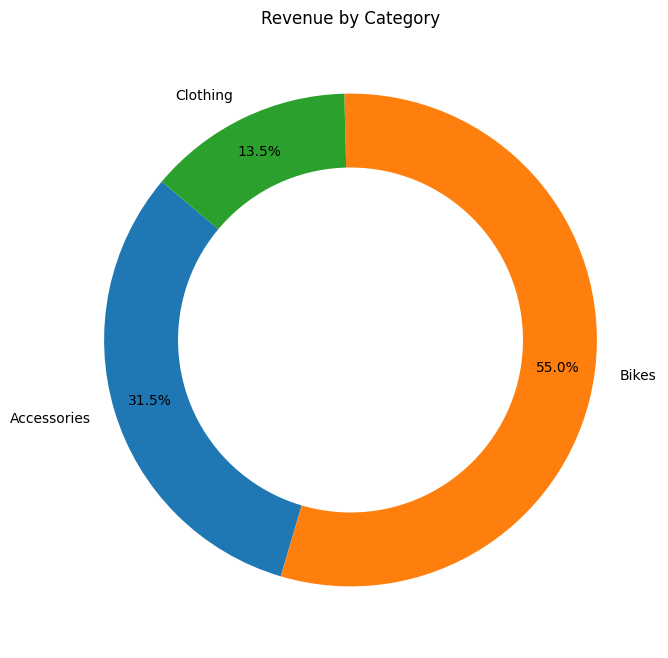

In [ ]:


# Calculate total revenue by category
revenue_by_category = data.groupby('Product Category')['Revenue'].sum().reset_index()

# Create a donut chart
plt.figure(figsize=(8, 8))
plt.pie(revenue_by_category['Revenue'], labels=revenue_by_category['Product Category'], autopct='%1.1f%%', startangle=140, pctdistance=0.85, wedgeprops=dict(width=0.4))

# Add a circle in the center to make it a donut chart
center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title("Revenue by Category")
plt.show()


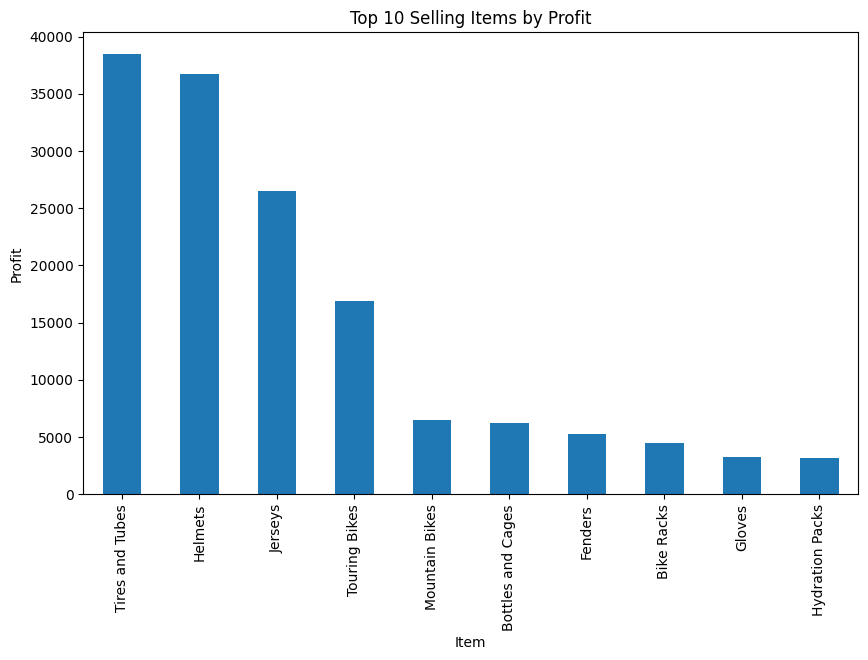

In [ ]:
# Assuming you want to consider the top 'n' selling items
n = 10  # You can change this to the desired number of top items

# Calculate profit by item
profit_by_item = data.groupby('Sub Category')['Revenue'].sum() - data.groupby('Sub Category')['Cost'].sum()
top_items = profit_by_item.nlargest(n)

# Create a bar chart
top_items.plot(kind='bar', figsize=(10, 6))
plt.title(f"Top {n} Selling Items by Profit")
plt.xlabel("Item")
plt.ylabel("Profit")
plt.show()


In [ ]:
import plotly.express as px

# Assuming you have 'Year' and 'Month' columns

# Group by year and month and calculate total quantity sold
monthly_quantity = data.groupby(['Year', 'Month'])['Quantity'].sum().unstack()

# Transpose the DataFrame to have months on the x-axis and years stacked
monthly_quantity = monthly_quantity.T

# Create the stacked bar chart with tooltip
fig = px.bar(monthly_quantity, barmode='stack')
fig.update_layout(title="Total Quantity Sold by Month (Stacked by Year)",
                  xaxis_title="Month",
                  yaxis_title="Total Quantity Sold",
                  xaxis=dict(categoryorder='total ascending'))
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.show()


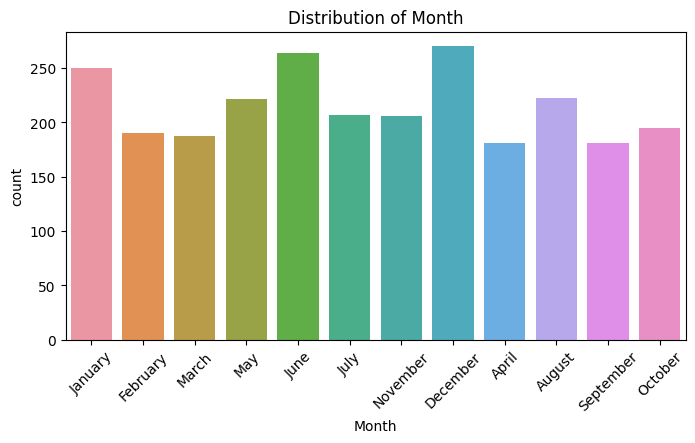

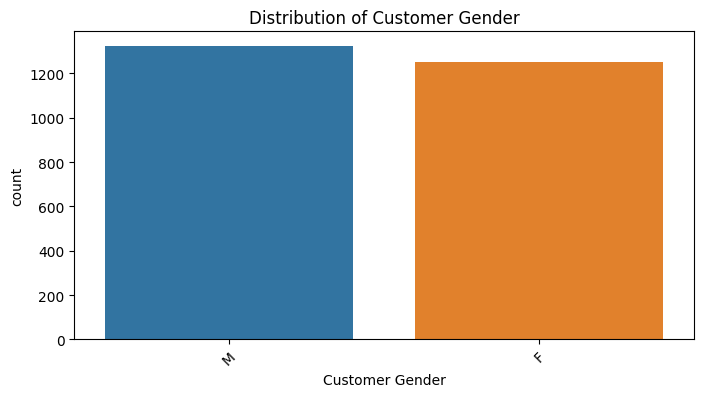

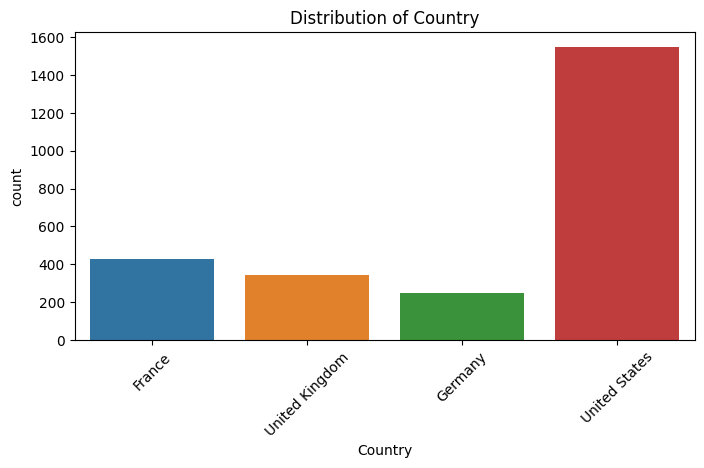

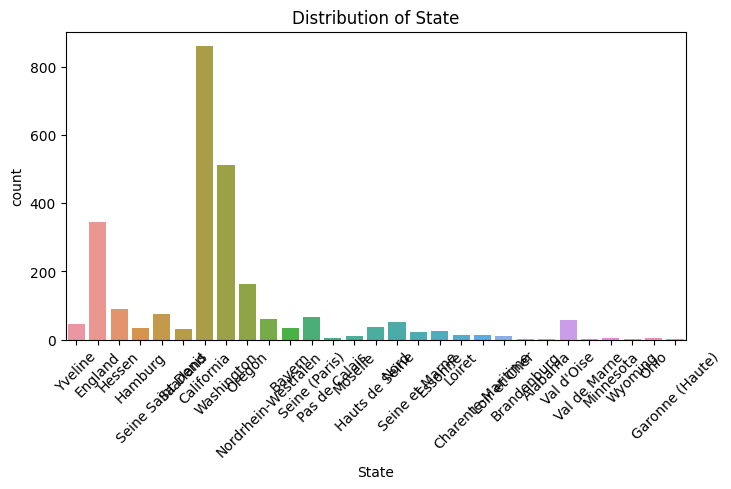

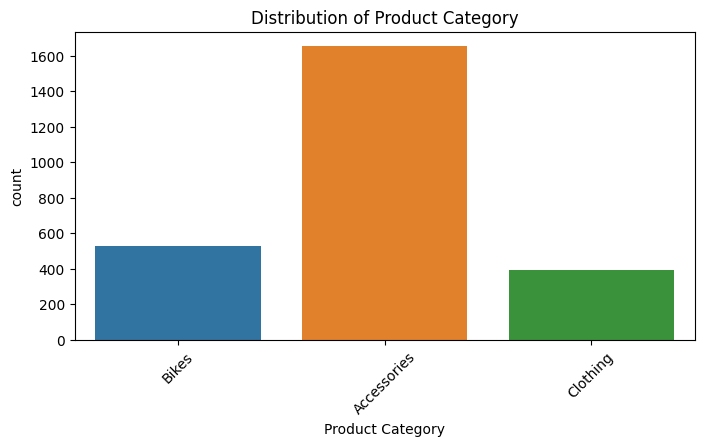

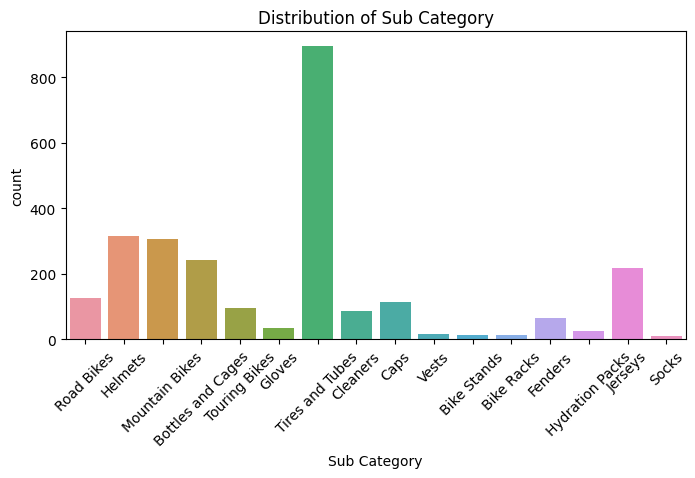

In [ ]:
# Distribution of categorical features
categorical_features = data.select_dtypes(include=['object'])
for feature in categorical_features.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
# Calculate and display key business metrics
total_revenue = data['Revenue'].sum()
average_revenue_per_sale = data['Revenue'].mean()
max_quantity_sold = data['Quantity'].max()
min_quantity_sold = data['Quantity'].min()

print(f"Total Revenue: ${total_revenue:.2f}")
print(f"Average Revenue per Sale: ${average_revenue_per_sale:.2f}")
print(f"Maximum Quantity Sold in a Single Transaction: {max_quantity_sold}")
print(f"Minimum Quantity Sold in a Single Transaction: {min_quantity_sold}")


Total Revenue: $1811387.00
Average Revenue per Sale: $703.72
Maximum Quantity Sold in a Single Transaction: 3.0
Minimum Quantity Sold in a Single Transaction: 1.0


In [ ]:
# Create age groups
age_bins = [0, 18, 35, 50, 100]
age_labels = ['0-18', '19-35', '36-50', '51+']
data['Age Group'] = pd.cut(data['Customer Age'], bins=age_bins, labels=age_labels, right=False)

# Drop unnecessary columns
data = data.drop(['State', 'Date','Customer Age'], axis=1)

# Print the modified DataFrame
data.head()


,Year,Month,Customer Gender,Country,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Age Group
312,2016,January,M,France,Bikes,Road Bikes,3.0,567.0,790.0,1701.0,2370.0,36-50
313,2016,January,M,France,Accessories,Helmets,2.0,192.5,199.0,385.0,398.0,36-50
314,2016,January,M,France,Bikes,Mountain Bikes,2.0,1160.0,1511.5,2320.0,3023.0,36-50
315,2016,January,M,France,Accessories,Bottles and Cages,2.0,115.0,147.0,230.0,294.0,36-50
316,2016,January,M,France,Accessories,Bottles and Cages,1.0,140.0,167.0,140.0,167.0,36-50


In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = ['Customer Gender', 'Country', 'Product Category', 'Sub Category', 'Age Group']

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])



,Year,Month,Customer Gender,Country,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Age Group
312,2016,January,1,0,1,11,3.0,567.0,790.0,1701.0,2370.0,2
313,2016,January,1,0,0,7,2.0,192.5,199.0,385.0,398.0,2
314,2016,January,1,0,1,10,2.0,1160.0,1511.5,2320.0,3023.0,2
315,2016,January,1,0,0,2,2.0,115.0,147.0,230.0,294.0,2
316,2016,January,1,0,0,2,1.0,140.0,167.0,140.0,167.0,2


In [ ]:
# Assuming your DataFrame is named 'data'
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

data['Month'] = data['Month'].map(month_mapping)


In [ ]:
# Print the modified DataFrame
data.head()


,Year,Month,Customer Gender,Country,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Age Group
312,2016,1,1,0,1,11,3.0,567.0,790.0,1701.0,2370.0,2
313,2016,1,1,0,0,7,2.0,192.5,199.0,385.0,398.0,2
314,2016,1,1,0,1,10,2.0,1160.0,1511.5,2320.0,3023.0,2
315,2016,1,1,0,0,2,2.0,115.0,147.0,230.0,294.0,2
316,2016,1,1,0,0,2,1.0,140.0,167.0,140.0,167.0,2


In [ ]:
# Define the features (X) and target variable (y)
X = data.drop('Revenue', axis=1)
y = data['Revenue']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (2059, 11) (2059,)
Testing set shape: (515, 11) (515,)
